In [226]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

# Setup

In [270]:
uefa_df = pd.read_csv('data/uefa.com/uefa_stats.csv') # stats from uefa website
standings = pd.read_csv('data/other/table.csv') # table with standings +
results =  pd.read_csv('data/other/results.csv') # all league phase match results

In [271]:
team_map = {
'results' : {
    'AC Milan':'MIL',
    'Arsenal':'ARS',
    'Aston Villa':'AVL',
    'Atalanta':'ATA',
    'Atlético de Madrid':'ATM',
    'Barcelona':'BAR',
    'Bayer Leverkusen':'BO4',
    'Bayern München':'MUN',
    'Benfica':'BEN',
    'Bologna':'BOL',
    'Borussia Dortmund':'BVB',
    'Brest':'BRE',
    'Celtic':'CEL',
    'Club Brugge':'BRU',
    'Crvena Zvezda':'RSB',
    'Feyenoord':'FEY',
    'GNK Dinamo':'DZG',
    'Girona':'GIR',
    'Inter':'INT',
    'Juventus':'JUV',
    'Leipzig':'RBL',
    'Lille':'LILL',
    'Liverpool':'LIV',
    'Manchester City':'MNC',
    'Monaco':'MON',
    'PSV Eindhoven':'PSV',
    'Paris Saint-Germain':'PSG',
    'Real Madrid':'RMA',
    'Salzburg':'SLZ',
    'Shakhtar Donetsk':'SHK',
    'Slovan Bratislava':'SLV',
    'Sparta Praha':'SPP',
    'Sporting CP':'SCP',
    'Sturm Graz':'STG',
    'Stuttgart':'VFB',
    'Young Boys':'YB'
},
'uefa_df': {
    'Bayern München':'MUN',
    'Man City':'MNC',
    'Paris':'PSG',
    'PSV':'PSV',
    'Stuttgart': 'VFB',
    'Atalanta':'ATA',
    'Leverkusen':'B04',
    'Liverpool':'LIV',
    'Real Madrid':'RMA',
    'Barcelona':'BAR',
    'Milan':'MIL',
    'B. Dortmund':'BVB',
    'Arsenal':'ARS',
    'Aston Villa':'AVL',
    'Benfica':'BEN',
    'Sporting CP':'SCP',
    'Inter':'INT',
    'Brest':'BRE',
    'Leipzig':'RBL',
    'Atleti':'ATM',
    'Monaco':'MON',
    'Crvena Zvezda':'RSB',
    'Bologna':'BOL',
    'Club Brugge':'BRU',
    'Juventus':'JUV',
    'Feyenoord':'FEY',
    'Celtic':'CEL',
    'Young Boys':'YB',
    'Girona':'GIR',
    'Lille':'LILL',
    'GNK Dinamo':'DZG',
    'Shakhtar':'SHK',
    'Salzburg':'SLZ',
    'Sparta Praha':'SPP',
    'Sturm Graz':'STG',
    'S. Bratislava':'SLV'
}}

In [272]:
uefa_df['symbol'] = uefa_df['Team'].map(team_map['uefa_df'])
uefa_df.drop(columns=['Country_x','Country_y'],inplace=True)
results['home symbol'] = results['home'].map(team_map['results'])
results['away symbol'] = results['away'].map(team_map['results'])


In [273]:
uefa_df.columns

Index(['Team', 'Total Attempts', 'Attempts On Target', 'Attempts Off Target',
       'Blocked', 'Balls Recovered', 'Tackles', 'Tackles Won', 'Tackles lost',
       'Clearances Attempted', 'Passing Accuracy %', 'Passes Attempted',
       'Passes Completed', 'Possession', 'Crossing Accuracy',
       'Crosses Attempted', 'Crosses Completed', 'Free-kicks Taken', 'Saves',
       'Goals Conceded', 'Own Goals Conceded', 'Saves From Penalties',
       'Clean Sheets', 'Punches made', 'GP', 'Goals', 'Right Foot',
       'Left Foot', 'Head', 'Other', 'Goals inside Area', 'Goals outside Area',
       'Penalties Scored', 'Attacks', 'Assists', 'Corners Taken', 'Offsides',
       'Dribbles', 'Country', 'Fouls Commited', 'Fouls Suffered',
       'Yellow Cards', 'Red Cards', 'symbol'],
      dtype='object')

In [274]:
master_df = uefa_df.merge(standings, left_on='symbol', right_on='team' )
master_df.drop(columns=['GP_y','GP_x','team','name'], axis=1, inplace=True)
master_df.sort_values(by='standing',ascending=True, inplace=True)

In [275]:
master_df.to_csv('data/master_table.csv', index=False)
master_df.columns


Index(['Team', 'Total Attempts', 'Attempts On Target', 'Attempts Off Target',
       'Blocked', 'Balls Recovered', 'Tackles', 'Tackles Won', 'Tackles lost',
       'Clearances Attempted', 'Passing Accuracy %', 'Passes Attempted',
       'Passes Completed', 'Possession', 'Crossing Accuracy',
       'Crosses Attempted', 'Crosses Completed', 'Free-kicks Taken', 'Saves',
       'Goals Conceded', 'Own Goals Conceded', 'Saves From Penalties',
       'Clean Sheets', 'Punches made', 'Goals', 'Right Foot', 'Left Foot',
       'Head', 'Other', 'Goals inside Area', 'Goals outside Area',
       'Penalties Scored', 'Attacks', 'Assists', 'Corners Taken', 'Offsides',
       'Dribbles', 'Country', 'Fouls Commited', 'Fouls Suffered',
       'Yellow Cards', 'Red Cards', 'symbol', 'standing', 'W', 'D', 'L', 'GF',
       'GA', 'GD', 'P'],
      dtype='object')

In [276]:
cols = [
    'Team',
    'Total Attempts',
    'Attempts On Target',
    'Attempts Off Target',
    'Blocked',
    'Balls Recovered',
    'Tackles',
    'Tackles Won',
    'Tackles lost',
    'Clearances Attempted',
    'Passing Accuracy %',
    'Passes Attempted',
    'Passes Completed',
    'Possession',
    'Crossing Accuracy',
    'Crosses Attempted',
    'Crosses Completed',
    'Free-kicks Taken',
    'Saves',
    'Goals Conceded',
    'Own Goals Conceded',
    'Saves From Penalties',
    'Clean Sheets',
    'Punches made',
    'Goals',
    'Right Foot',
    'Left Foot',
    'Head',
    'Other',
    'Goals inside Area',
    'Goals outside Area',
    'Penalties Scored',
    'Attacks',
    'Assists',
    'Corners Taken',
    'Offsides',
    'Dribbles',
    'Country',
    'Fouls Commited',
    'Fouls Suffered',
    'Yellow Cards',
    'Red Cards',
    'symbol',
    'standing',
    'W', 'D', 'L', 'GF', 'GA', 'GD', 'P'
]

# Visualizations

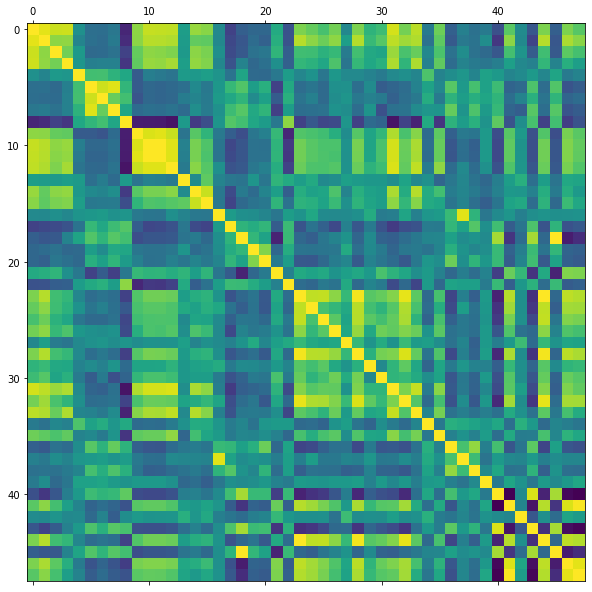

standing               -0.970164
L                      -0.943780
Goals Conceded         -0.712347
GA                     -0.712347
Fouls Commited         -0.482126
Clearances Attempted   -0.468839
Saves                  -0.421277
Saves From Penalties   -0.405148
Tackles lost           -0.399333
Tackles                -0.389831
Own Goals Conceded     -0.365675
Punches made           -0.354813
Tackles Won            -0.273527
Yellow Cards           -0.262860
Offsides               -0.198064
Balls Recovered        -0.088201
Fouls Suffered         -0.066067
Free-kicks Taken        0.036939
Crosses Attempted       0.092000
D                       0.112416
Blocked                 0.133280
Other                   0.167633
Crossing Accuracy       0.178935
Red Cards               0.195819
Dribbles                0.200290
Crosses Completed       0.213244
Corners Taken           0.240091
Goals outside Area      0.348893
Head                    0.414655
Attempts Off Target     0.417848
Possession

In [211]:
# quick screen for correlations
plt.figure(figsize=(10,10))
master_corr = master_df.corr()
plt.matshow(master_df.corr(),fignum=1)
plt.show()
master_corr['P'].sort_values()

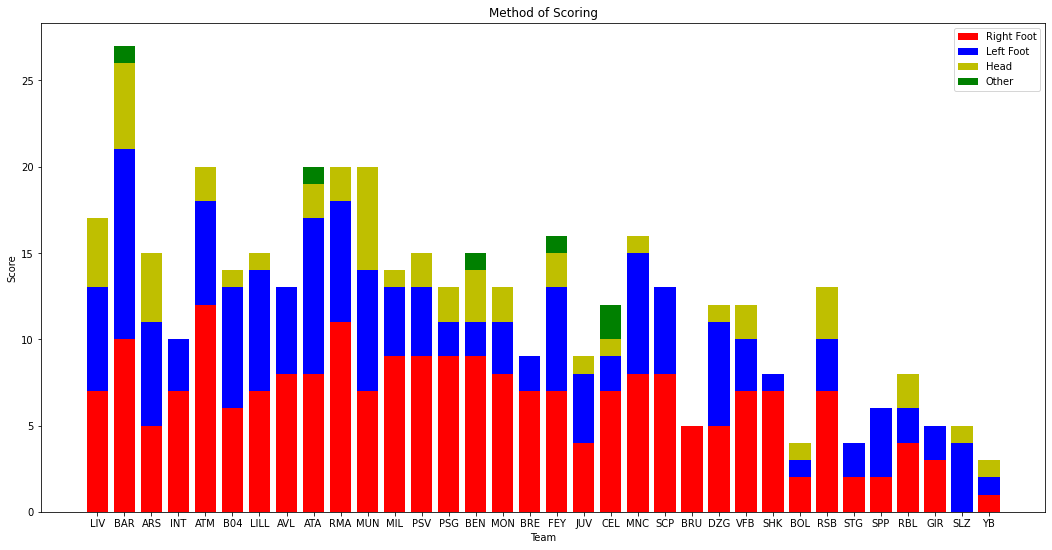

In [212]:
# lets do stacked bar charts for right foot/ left foot/ header goals
team_labels = master_df.symbol
rf = master_df['Right Foot']
lf = master_df['Left Foot']
head = master_df['Head']
other = master_df['Other']
x = [rf,lf,head,other]

plt.subplots(figsize=(18,9),facecolor='white')
plt.bar(team_labels, rf, color='r')
plt.bar(team_labels, lf, bottom=rf, color='b')
plt.bar(team_labels, head, bottom=rf+lf, color='y')
plt.bar(team_labels, other, bottom=rf+lf+head, color='g')
plt.legend(['Right Foot','Left Foot','Head','Other'])
plt.xlabel("Team")
plt.ylabel("Score")
plt.title("Method of Scoring")
plt.savefig('visualizations/method_of_scoring')
plt.show()

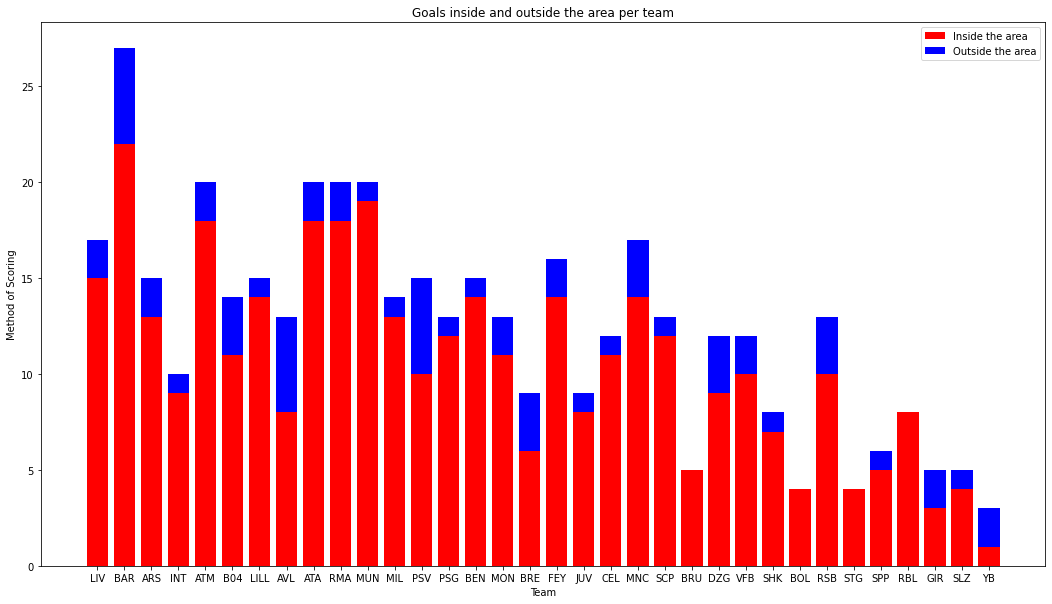

In [213]:
plt.subplots(figsize=(18,10),facecolor='white')
plt.bar(team_labels, master_df['Goals inside Area'], color='r')
plt.bar(team_labels, master_df['Goals outside Area'], bottom=master_df['Goals inside Area'], color='b')
plt.xlabel("Team")
plt.ylabel("Method of Scoring")
plt.legend(["Inside the area", "Outside the area"])
plt.title("Goals inside and outside the area per team")
plt.savefig('visualizations/scoring_areas')
plt.show()

Text(0.5, 1.0, 'Histogram of points per team')

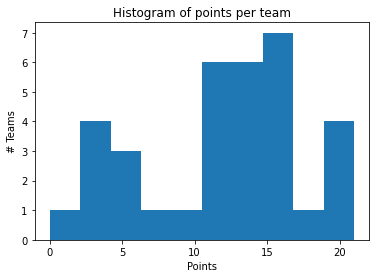

In [71]:
# not much insight here but was worth a shot
plt.hist(x=master_df.P, bins=10)
plt.xlabel("Points")
plt.ylabel("# Teams")
plt.title("Histogram of points per team")

## Normalize data

In [277]:
results
home_df = uefa_df.copy()
home_df.columns = 'Home_' + home_df.columns.values
away_df = uefa_df.copy()
away_df.columns = 'Away_' + away_df.columns.values
home_df.columns

Index(['Home_Team', 'Home_Total Attempts', 'Home_Attempts On Target',
       'Home_Attempts Off Target', 'Home_Blocked', 'Home_Balls Recovered',
       'Home_Tackles', 'Home_Tackles Won', 'Home_Tackles lost',
       'Home_Clearances Attempted', 'Home_Passing Accuracy %',
       'Home_Passes Attempted', 'Home_Passes Completed', 'Home_Possession',
       'Home_Crossing Accuracy', 'Home_Crosses Attempted',
       'Home_Crosses Completed', 'Home_Free-kicks Taken', 'Home_Saves',
       'Home_Goals Conceded', 'Home_Own Goals Conceded',
       'Home_Saves From Penalties', 'Home_Clean Sheets', 'Home_Punches made',
       'Home_GP', 'Home_Goals', 'Home_Right Foot', 'Home_Left Foot',
       'Home_Head', 'Home_Other', 'Home_Goals inside Area',
       'Home_Goals outside Area', 'Home_Penalties Scored', 'Home_Attacks',
       'Home_Assists', 'Home_Corners Taken', 'Home_Offsides', 'Home_Dribbles',
       'Home_Country', 'Home_Fouls Commited', 'Home_Fouls Suffered',
       'Home_Yellow Cards', 'Home_

In [301]:
predictor_df = pd.merge(results,home_df, left_on='home symbol',right_on='Home_symbol').merge(away_df, left_on='away symbol', right_on='Away_symbol')


In [302]:
predictor_df.drop(columns=['date','home','away','home symbol','away symbol','Home_Team','Away_Team','Home_Country','Away_Country','Home_symbol','Away_symbol'],inplace=True)
predictor_df.columns

Index(['HG', 'AG', 'Home_Total Attempts', 'Home_Attempts On Target',
       'Home_Attempts Off Target', 'Home_Blocked', 'Home_Balls Recovered',
       'Home_Tackles', 'Home_Tackles Won', 'Home_Tackles lost',
       'Home_Clearances Attempted', 'Home_Passing Accuracy %',
       'Home_Passes Attempted', 'Home_Passes Completed', 'Home_Possession',
       'Home_Crossing Accuracy', 'Home_Crosses Attempted',
       'Home_Crosses Completed', 'Home_Free-kicks Taken', 'Home_Saves',
       'Home_Goals Conceded', 'Home_Own Goals Conceded',
       'Home_Saves From Penalties', 'Home_Clean Sheets', 'Home_Punches made',
       'Home_GP', 'Home_Goals', 'Home_Right Foot', 'Home_Left Foot',
       'Home_Head', 'Home_Other', 'Home_Goals inside Area',
       'Home_Goals outside Area', 'Home_Penalties Scored', 'Home_Attacks',
       'Home_Assists', 'Home_Corners Taken', 'Home_Offsides', 'Home_Dribbles',
       'Home_Fouls Commited', 'Home_Fouls Suffered', 'Home_Yellow Cards',
       'Home_Red Cards', 'Away

In [313]:
y = predictor_df[['HG','AG']]
X = predictor_df[predictor_df.columns.difference(['HG','AG'])]

In [314]:
# Normalization
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalized_df = normalizer.fit_transform(X=X)

In [315]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [317]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

l_reg = LinearRegression()
l_reg.fit(X_train, y_train)
y_pred = l_reg.predict(X_test)
y_pred


array([[ 0.92700195,  1.36074829],
       [ 0.69909668,  2.33734131],
       [ 1.97998047,  3.91842651],
       [ 2.71722412,  1.20431519],
       [ 0.57440186, -0.15679932],
       [ 1.30737305,  0.44216919],
       [ 1.07733154,  0.32852173],
       [ 2.25030518,  0.94403076],
       [ 4.76495361, -1.36456299],
       [ 5.37774658,  2.55786133],
       [ 3.64764404,  3.7578125 ],
       [ 0.42913818,  2.82806396],
       [-1.309021  ,  5.03250122],
       [ 5.42602539,  1.56362915],
       [ 1.70367432,  2.50888062],
       [ 4.15893555,  0.23587036],
       [ 2.54040527,  2.74536133],
       [ 0.11535645,  0.7052002 ],
       [ 0.92700195,  1.36074829],
       [ 6.64398193, -1.15744019],
       [ 4.08679199, -1.54187012],
       [ 0.60595703,  0.68560791],
       [ 0.80780029,  0.98184204],
       [ 4.13378906,  0.65817261],
       [ 2.63787842,  2.49914551],
       [ 1.6842041 ,  1.04736328],
       [ 0.38098145,  0.68276978],
       [ 7.99841309, -0.79330444]])

In [318]:
mse = mean_squared_error(y_pred=y_pred, y_true=y_test)
mae = mean_absolute_error(y_pred=y_pred, y_true=y_test)
print(f'mse: {mse}\nmae: {mae}')

mse: 5.257501302736014
mae: 1.7137391226632257


In [30]:
# PCA?
from sklearn.decomposition import PCA

In [ ]:
# Exploration
